In [36]:
run data_combination.ipynb

/var/folders/pf/mv0_fdqn61n3q3z1ydyffgfc0000gn/T/ipykernel_2544/3565602700.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  merge3_6 = pd.merge(df3,df6,how='right',on=['country name','year'])


In [37]:
#Hypothesis test for happiness score factors:
#Outcome: happiness score
#Predictors: GDP, GDP per capita (USD), rate of inflation (%) CPI Annual Percent Change, 
            #Healthy life expectancy at birth, Life Ladder, Log GDP per capita, Social support,
            #Freedom to make life choices, Generosity, Perceptions of corruption,
            #Positive affect, Negative affect, Confidence in national government
#Hypothesis: 
    #H0: None of these impact happiness score.
    #H1: At least one of these significantly impacts happiness score.

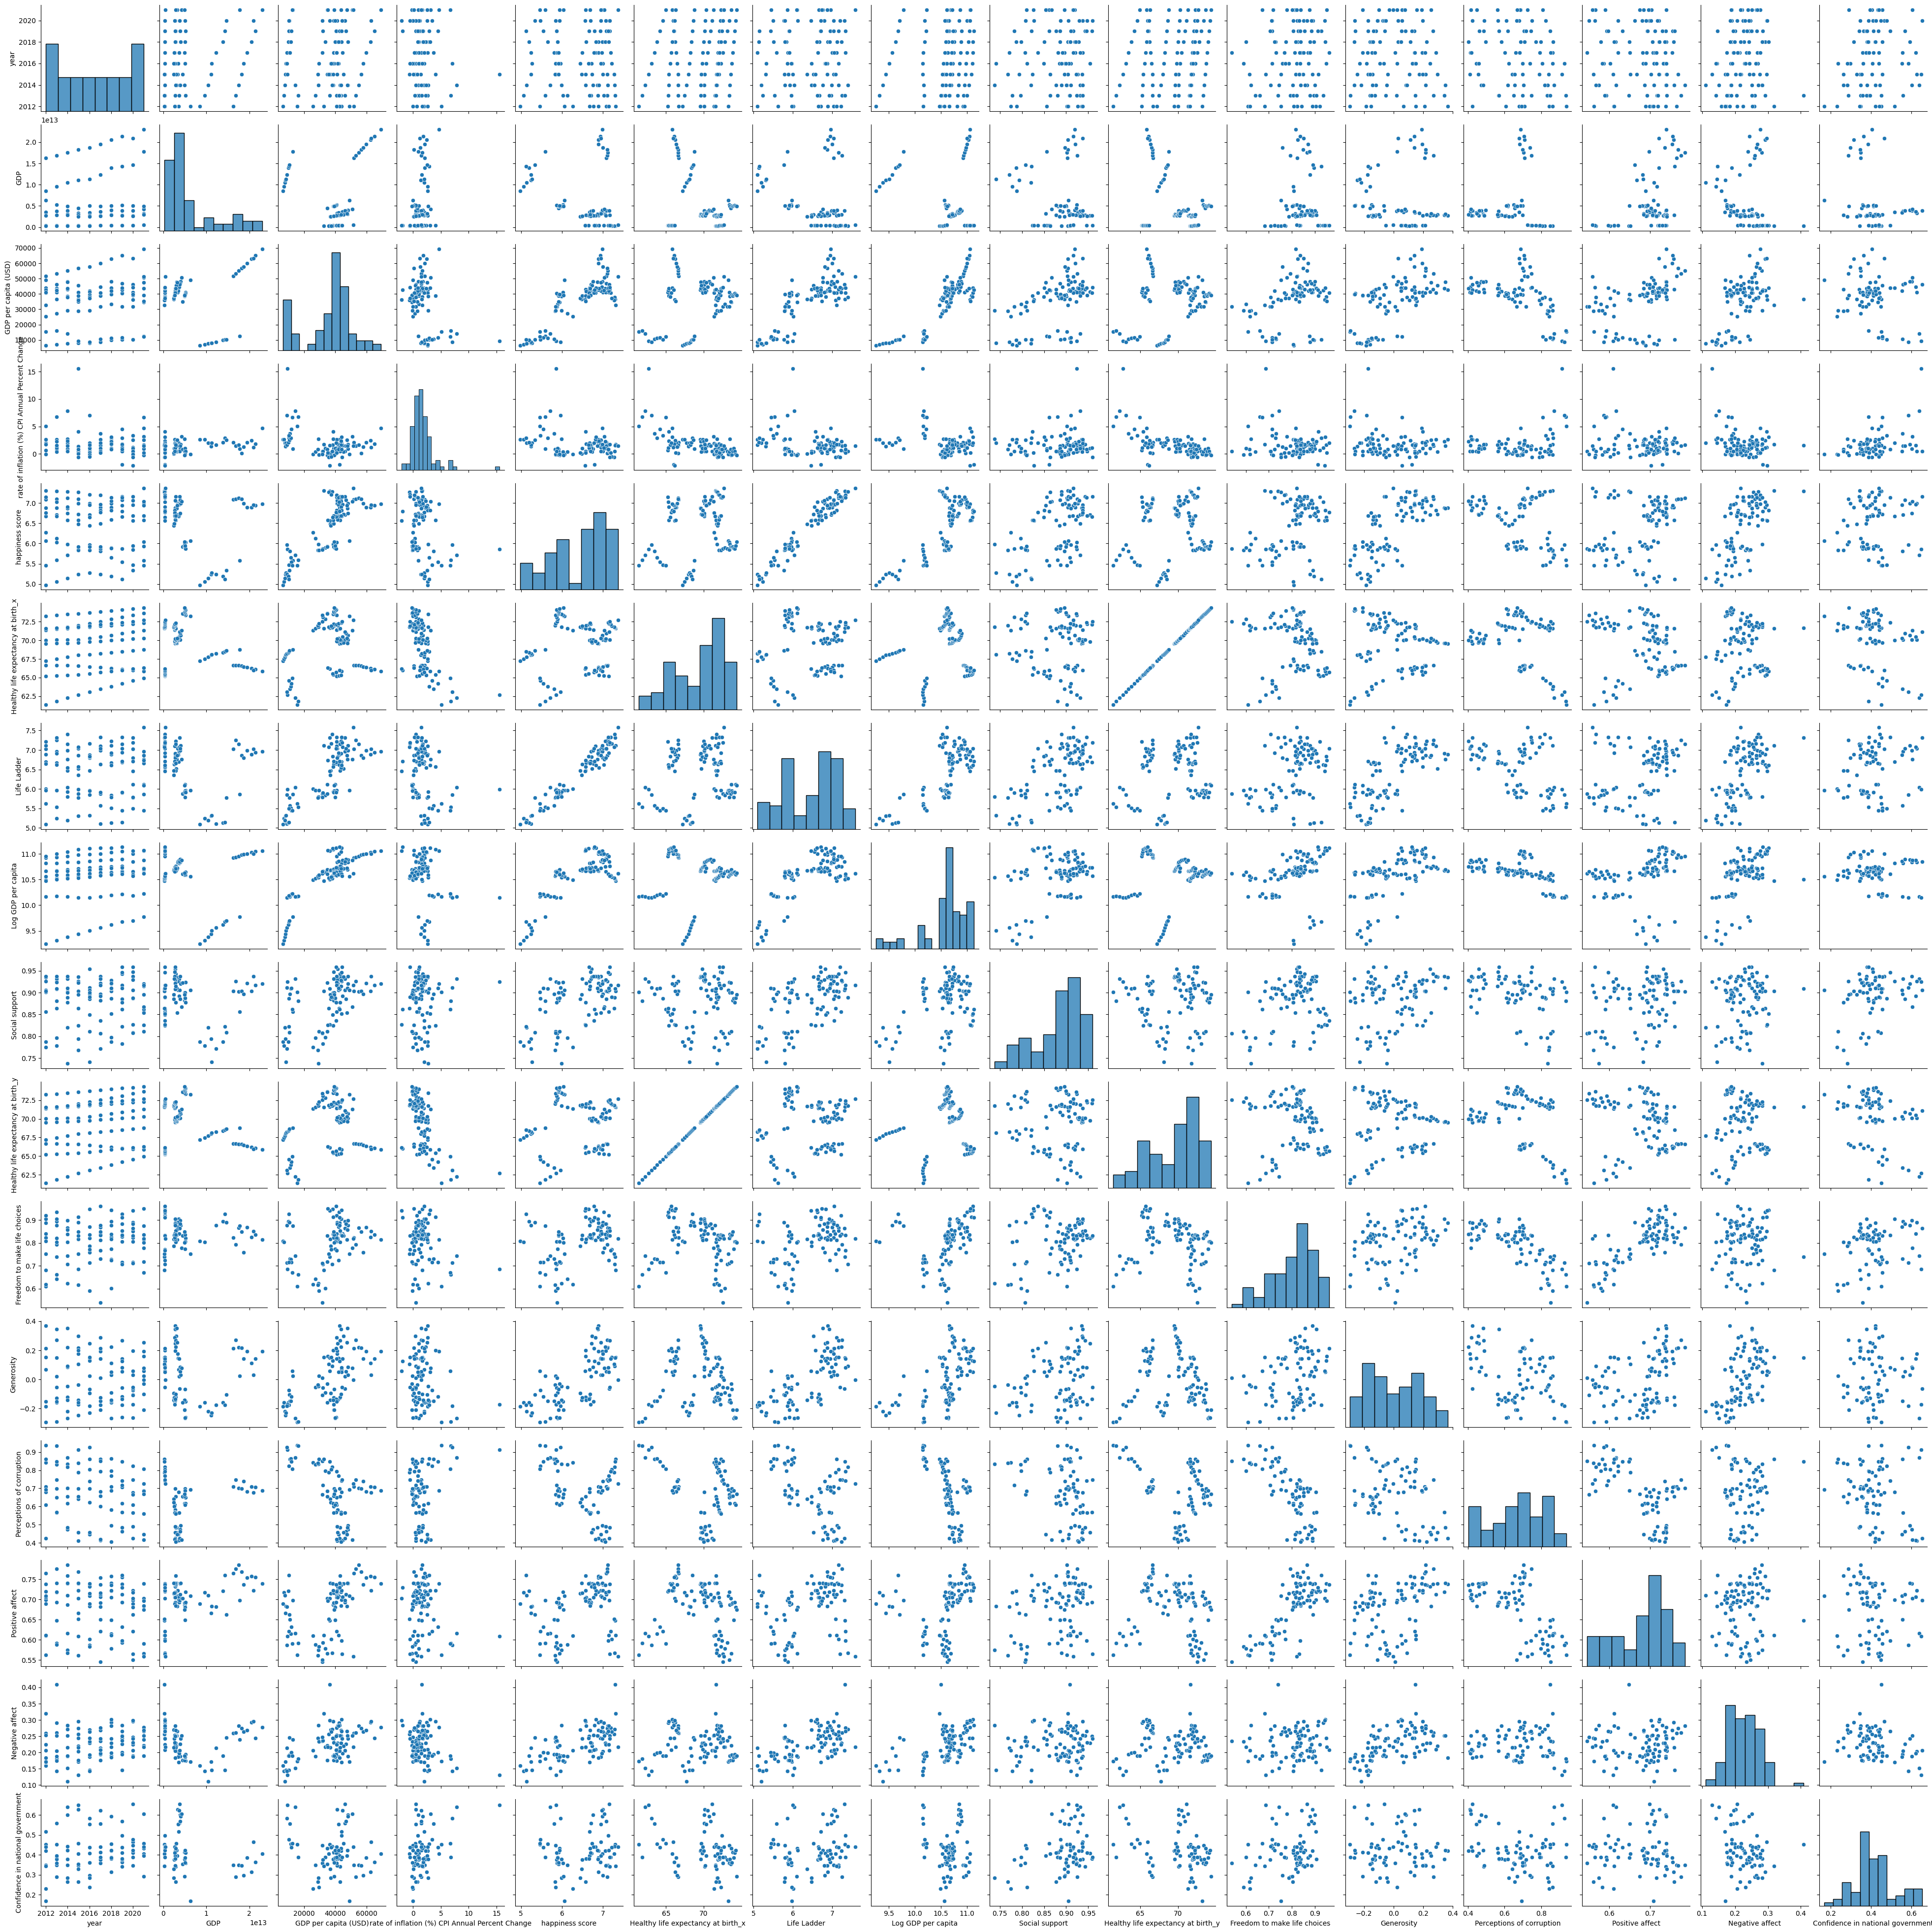

In [38]:
#Show distributions and scatterplots of the data using pairplot
import seaborn as sns
df = merge3_6_1
sns.pairplot(df)

In [39]:
# Do any of these variables look linearly correlated to each other? Which ones and which assumptions? 

#Happiness score are repectively correlated with life ladder, generosity, and Negative affect.
#Life Ladder are correlated with GDP per capita(USD), Generosity, and Negative affect.
#Generosity are correlated with Negative affect.
#Freedom to make life choices and Positive affect are correlated.

<AxesSubplot: >

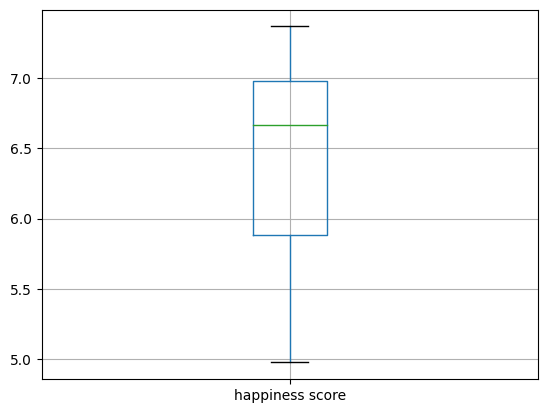

In [40]:
#Are their outliers in the outcome? 

import matplotlib.pyplot as plt
df.boxplot(column=['happiness score'])
#No obvious outliers.

In [41]:
# Multiple regression 

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices

# Conduct a multiple regression analysis 

df = df.dropna() #drop rows with null value
# fit the linear regression model
y = df['happiness score'] # dependent variable
X = df[['GDP', 'GDP per capita (USD)', 'rate of inflation (%) CPI Annual Percent Change', 
        'Life Ladder', 'Log GDP per capita', 'Social support',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
        'Positive affect', 'Negative affect', 'Confidence in national government']] # independent variable

X = sm.add_constant(X) # adding column of 1s
model = sm.OLS(y, X).fit() # fitting the model
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness score   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     86.74
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           5.46e-27
Time:                        21:23:59   Log-Likelihood:                 51.459
No. Observations:                  59   AIC:                            -82.92
Df Residuals:                      49   BIC:                            -62.14
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -0.0243      0.044     -0.552      0.584      -0.113       0.064
GDP                                             -1.471e-14   7.43e-15     -1.979      0.053   -2.96e-14    2.26e-16
GDP per capita (USD)                             7.568e-06   5.73e-06      1.320      0.193   -3.95e-06    1.91e-05
rate of inflation (%) CPI Annual Percent Change    -0.0223      0.019     -1.194      0.238      -0.060       0.015
Life Ladder                                         0.7275      0.070     10.419      0.000       0.587       0.868
Log GDP per capita                                  0.2397      0.083      2.888      0.006       0.073       0.407
Social support                                     -1.1950      0.726     -1.646      0.106      -2.654       0.264
Freedom to make life choices                       -0.3888      0.544     -0.715      0.478      -1.482       0.704
Generosity                                          0.4033      0.134      3.010      0.004       0.134       0.673
Perceptions of corruption                           0.1425      0.221      0.645      0.522      -0.301       0.586
Positive affect                                     0.1773      0.630      0.281      0.780      -1.089       1.444
Negative affect                                     1.1341      0.557      2.038      0.047       0.016       2.252
Confidence in national government                  -0.0640      0.249     -0.257      0.798      -0.565       0.437
==============================================================================
Omnibus:                        1.024   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.087
Skew:                           0.280   Prob(JB):                        0.581
Kurtosis:                       2.642   Cond. No.                     2.23e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#According to the model above, GDP, Life Ladder, Log GDP per capita, and Negative affect are statistically 
#significant with p-values less than 0.05. Therefore, we reject the null hypothesis.

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.2869998739953996
Residuals are normally distributed


/var/folders/pf/mv0_fdqn61n3q3z1ydyffgfc0000gn/T/ipykernel_2544/2608560338.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


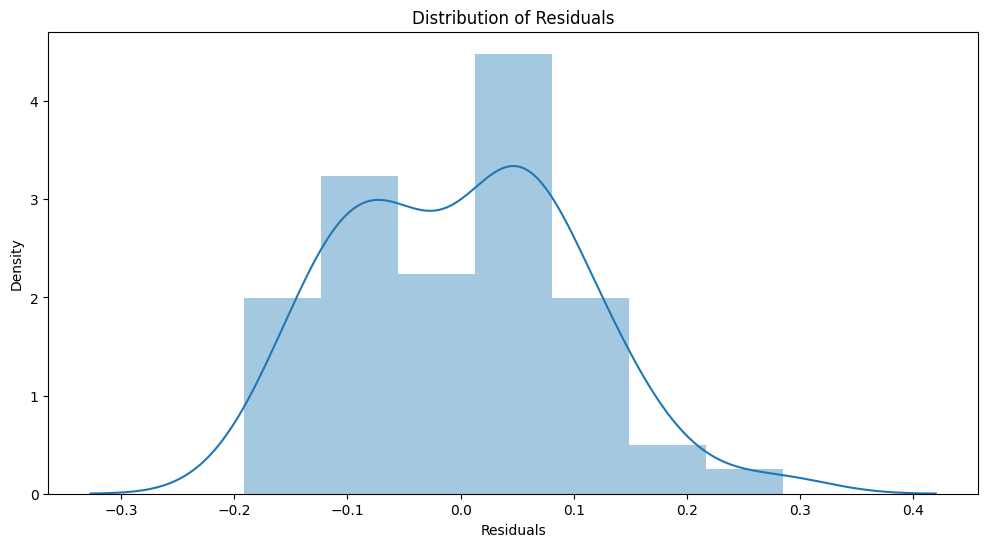


Assumption satisfied


In [45]:
from statsmodels.stats.diagnostic import normal_ad

# pairplot proves linearity 
"""
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
predictions = model.predict(X)
df_results = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
p_value_thresh=0.05

print('Assumption 2: The error terms are normally distributed', '\n')
    
print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')
    
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()
    
print()
if p_value > p_value_thresh:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')
    print()
    print('Confidence intervals will likely be affected')
    print('Try performing nonlinear transformations on variables')

Assumption 3: Little to no multicollinearity among predictors


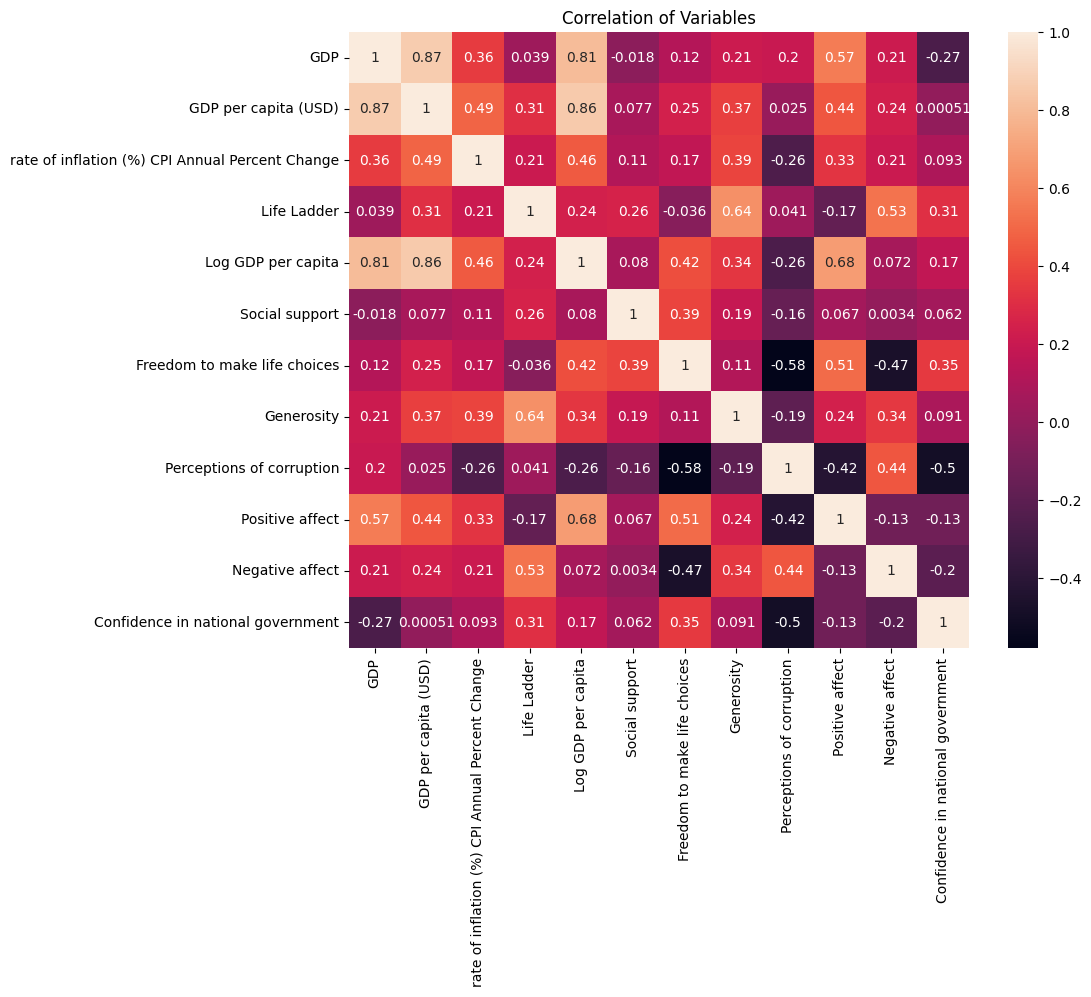

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


/Users/ahmedganibegovic/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [46]:
"""
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
from statsmodels.stats.outliers_influence import variance_inflation_factor
print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(X, columns=['GDP', 'GDP per capita (USD)', 'rate of inflation (%) CPI Annual Percent Change', 
        'Life Ladder', 'Log GDP per capita', 'Social support',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
        'Positive affect', 'Negative affect', 'Confidence in national government']).corr(), annot=True)
plt.title('Correlation of Variables')
plt.show()
        
print('Variance Inflation Factors (VIF)')
print('> 10: An indication that multicollinearity may be present')
print('> 100: Certain multicollinearity among the variables')
print('-------------------------------------')
# Gathering the VIF for each variable
VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
# for idx, vif in enumerate(VIF):
#     print('{0}: {1}'.format(['GDP', 'GDP per capita (USD)', 'rate of inflation (%) CPI Annual Percent Change', 
#         'Life Ladder', 'Log GDP per capita', 'Social support',
#         'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
#         'Positive affect', 'Negative affect', 'Confidence in national government'][idx], vif))
        
# Gathering and printing total cases of possible or definite multicollinearity
possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
print()
print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
print()

if definite_multicollinearity == 0:
    if possible_multicollinearity == 0:
        print('Assumption satisfied')
    else:
        print('Assumption possibly satisfied')
        print()
        print('Coefficient interpretability may be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')
else:
    print('Assumption not satisfied')
    print()
    print('Coefficient interpretability will be problematic')
    print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [47]:
"""
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
from statsmodels.stats.stattools import durbin_watson
print('Assumption 4: No Autocorrelation', '\n')

print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9243073756770819
Little to no autocorrelation 

Assumption satisfied


Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


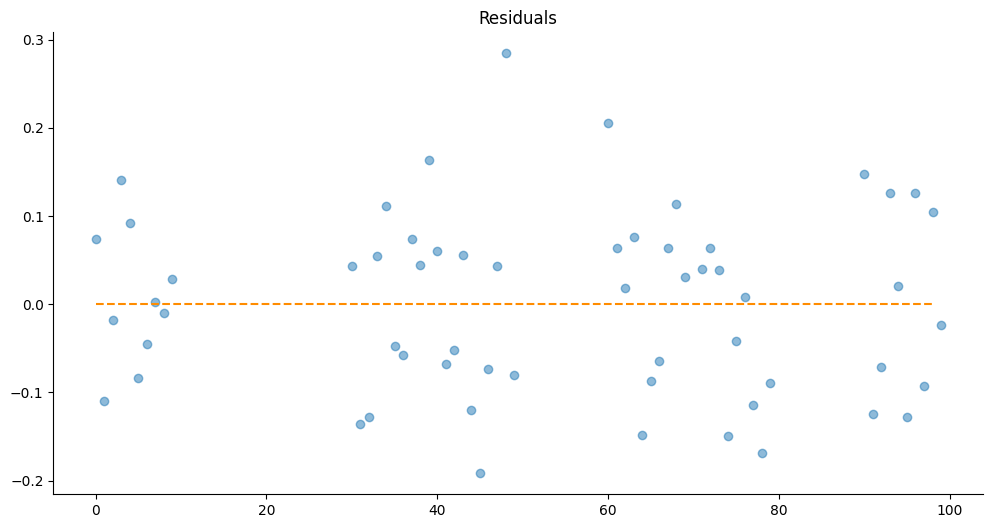

In [48]:
"""
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
print('Residuals should have relative constant variance')
        
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

#reference for assumptions: https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/